In [1]:
from vega_datasets import data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import datetime

# SF_Temps

In [2]:
df = data.sf_temps()

In [3]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [4]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%m:%s')

In [5]:
df = df.set_index('date')

### 1. Resample by the day and take the average temperature. Visualize the average temperature over time.

### 2. Write the code necessary to visualize the minimum temperature over time.


### 3. Write the code necessary to visualize the maximum temperature over time.


In [6]:
df.resample('D').mean().head(2)

,temp
date,
2010-01-01,49.170833
2010-01-02,49.304167


<AxesSubplot:xlabel='date'>

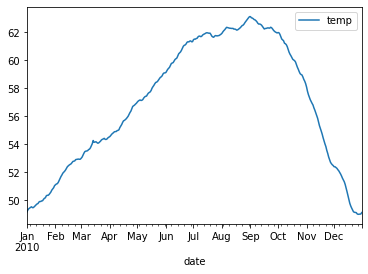

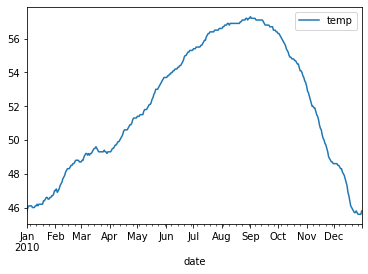

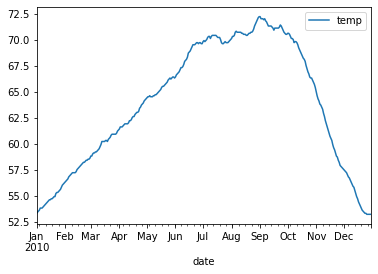

In [7]:
df.resample('D').mean().plot()
df.resample('D').min().plot()
df.resample('D').max().plot()

### 4. Which month is the coldest, on average?
### 5. Which month has the highest average temperature?


In [8]:
df_month_mean = df.resample('m').mean()

In [9]:
df_month_mean[df_month_mean == df_month_mean.min()].dropna()

,temp
date,
2010-01-31,49.98414


In [10]:
df_month_mean[df_month_mean == df_month_mean.max()].dropna()

,temp
date,
2010-09-30,62.487083


### 6. Resample by the day and calculate the min and max temp for the day (Hint: ```.agg(['min', 'max'])```). Use this resampled dataframe to calculate the change in temperature for the day. Which month has the highest daily temperature variability?

In [11]:
df2 = df.resample('D').agg(['min', 'max'])

In [12]:
df2['delta_T'] = df2.temp['max'] - df2.temp['min']

In [13]:
df2[df2.delta_T == df2.delta_T.max()]

temp       delta_T
             min   max        
date                          
2010-08-31  57.2  72.2    15.0

In [14]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### 7. **Bonus**: Visualize the daily min, average, and max temperature over time on a single line plot, i.e. the min, average, and maximum temperature should be 3 seperate lines.

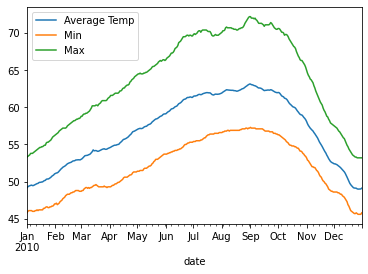

In [15]:
df.resample('D').mean().temp.plot(label='Average Temp')
df.resample('D').min().temp.plot(label='Min')
df.resample('D').max().temp.plot(label='Max')
plt.legend()
plt.show()

# Seattle

In [16]:
df = data.seattle_weather()

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           1461 non-null   datetime64[ns]
 1   precipitation  1461 non-null   float64       
 2   temp_max       1461 non-null   float64       
 3   temp_min       1461 non-null   float64       
 4   wind           1461 non-null   float64       
 5   weather        1461 non-null   object        
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 68.6+ KB


In [18]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [19]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [20]:
df.set_index('date', inplace=True)

### 1. Which year and month combination has the highest amount of precipitation?

In [21]:
df.resample('M').mean()[df.resample('M').precipitation.mean() == df.resample('m').precipitation.mean().max()].dropna()

,precipitation,temp_max,temp_min,wind
date,,,,
2015-12-31,9.177419,8.380645,3.825806,4.341935


### 2. Visualize the amount of monthly precipitation over time.

<AxesSubplot:xlabel='date'>

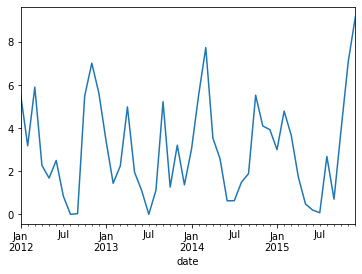

In [22]:
df.resample('M').mean().precipitation.plot()

### 3. Visualize the amount of wind over time. Choose a time interval you think is appropriate.

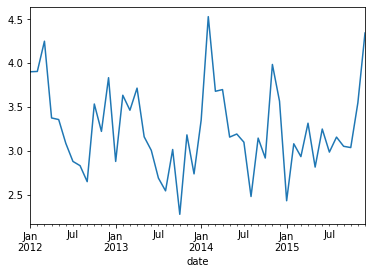

In [23]:
df.resample('M').mean().wind.plot()
plt.show()

### 4. Which year-month combination is the windiest?

In [24]:
df.resample('4M').mean()[df.resample('4M').wind.mean() == df.resample('4M').mean().wind.max()]

,precipitation,temp_max,temp_min,wind
date,,,,
2012-01-31,5.590323,7.054839,1.541935,3.9


### 5. What's the sunniest year? (Hint: which day has the highest number of days where weather == sun?)

In [25]:
dummy = pd.get_dummies(df.weather)

In [26]:
df = pd.concat([df, dummy], axis=1)

In [27]:
df.resample('Y').sun.sum()[df.resample('Y').sun.sum() == df.resample('Y').sun.sum().max()]

date
2014-12-31    211
Freq: A-DEC, Name: sun, dtype: uint8

### 6. In which month does it rain the most?

In [28]:
# for x in range(1:13):

df['month'] = df.index.month_name()

In [29]:
df.groupby('month').precipitation.sum()

month
April        375.4
August       163.7
December     622.7
February     422.0
January      466.0
July          48.2
June         132.9
March        606.2
May          207.5
November     642.5
October      503.4
September    235.5
Name: precipitation, dtype: float64

In [30]:
df.groupby('month').precipitation.sum()[df.groupby('month').precipitation.sum() == df.groupby('month').precipitation.sum().max()]

month
November    642.5
Name: precipitation, dtype: float64

### 7. Which month has the most number of days with a non-zero amount of precipitation?

In [31]:
df.head()

,precipitation,temp_max,temp_min,wind,weather,drizzle,fog,rain,snow,sun,month
date,,,,,,,,,,,
2012-01-01,0.0,12.8,5.0,4.7,drizzle,1,0,0,0,0,January
2012-01-02,10.9,10.6,2.8,4.5,rain,0,0,1,0,0,January
2012-01-03,0.8,11.7,7.2,2.3,rain,0,0,1,0,0,January
2012-01-04,20.3,12.2,5.6,4.7,rain,0,0,1,0,0,January
2012-01-05,1.3,8.9,2.8,6.1,rain,0,0,1,0,0,January


In [32]:
df['no_precip'] = df.precipitation == 0

In [33]:
df.resample('m').no_precip.sum()[df.resample('m').no_precip.sum() == df.resample('m').no_precip.sum().max()]

date
2012-08-31    31
2013-07-31    31
Name: no_precip, dtype: int64

# Flights

In [34]:
df = data.flights_20k()

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         20000 non-null  datetime64[ns]
 1   delay        20000 non-null  int64         
 2   distance     20000 non-null  int64         
 3   origin       20000 non-null  object        
 4   destination  20000 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 781.4+ KB


In [36]:
df.head()

,date,delay,distance,origin,destination
0,2001-01-13 14:56:00,32,417,SAN,SJC
1,2001-01-31 16:40:00,-5,1093,FLL,ISP
2,2001-02-11 18:39:00,3,293,LBB,DAL
3,2001-01-10 21:00:00,-15,550,MSY,MCO
4,2001-03-30 21:45:00,-2,229,STL,IND


In [37]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%m:%s')

In [38]:
df.set_index('date', inplace=True)

### Convert any negative delays to 0.

In [39]:
df[df.delay < 0] = 0

In [40]:
df.delay.min()

0

### Which hour of the day has the highest average delay?

In [41]:
df['hour_of_day'] = df.index.hour

In [42]:
df.groupby('hour_of_day').delay.mean().max()

302.5

In [43]:
df.groupby('hour_of_day').delay.mean()[df.groupby('hour_of_day').delay.mean() == df.groupby('hour_of_day').delay.mean().max()]

hour_of_day
3    302.5
Name: delay, dtype: float64

### Does the day of the week make a difference in the delay amount?

In [44]:
df['day_of_week'] = df.index.dayofweek

In [45]:
df.day_of_week

date
2001-01-13 14:56:00    5
2001-01-31 16:40:00    2
2001-02-11 18:39:00    6
2001-01-10 21:00:00    2
2001-03-30 21:45:00    4
                      ..
2001-03-22 15:10:00    3
2001-01-19 13:05:00    4
2001-02-07 11:37:00    2
2001-02-24 16:50:00    5
2001-03-14 11:33:00    2
Name: day_of_week, Length: 20000, dtype: int64

<AxesSubplot:xlabel='day_of_week'>

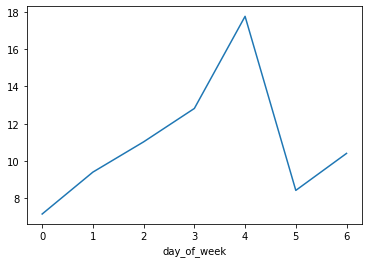

In [46]:
df.groupby('day_of_week').delay.mean().plot()

### Does the month make a difference in the delay amount?

In [47]:
df['month'] = df.index.month_name()

<AxesSubplot:xlabel='date'>

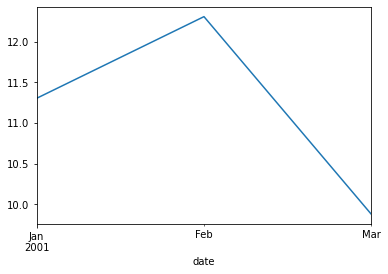

In [48]:
df.resample('m').delay.mean().plot()

In [49]:
df.groupby('month').delay.mean()

month
February    12.306106
January     11.301592
March        9.875287
Name: delay, dtype: float64

# Bonus: Iowa

In [50]:
df = data.iowa_electricity()

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   year            51 non-null     datetime64[ns]
 1   source          51 non-null     object        
 2   net_generation  51 non-null     int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.3+ KB


In [52]:
df.head()

,year,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [53]:
df.columns = ['date','source','net_generation']

In [54]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d')

In [55]:
df.head()

,date,source,net_generation
0,2001-01-01,Fossil Fuels,35361
1,2002-01-01,Fossil Fuels,35991
2,2003-01-01,Fossil Fuels,36234
3,2004-01-01,Fossil Fuels,36205
4,2005-01-01,Fossil Fuels,36883


In [56]:
df = df.pivot(index='date', columns='source')

In [57]:
df.columns = ['fossil_fuels', 'nuclear_energy', 'renewables']

### For each row, calculate the percentage of the year's total that energy source provided.

In [58]:
df['total_energy'] = df.fossil_fuels + df.nuclear_energy + df.renewables

In [59]:
df = df.assign(fossil_fuel_pct = df.fossil_fuels/df.total_energy * 100,
          nuclear_energy_pct = df.nuclear_energy / df.total_energy * 100,
          renewables_pct = df.renewables / df.total_energy * 100)

In [60]:
df

,fossil_fuels,nuclear_energy,renewables,total_energy,fossil_fuel_pct,nuclear_energy_pct,renewables_pct
date,,,,,,,
2001-01-01,35361,3853,1437,40651,86.986790,9.478242,3.534968
2002-01-01,35991,4574,1963,42528,84.628950,10.755267,4.615783
2003-01-01,36234,3988,1885,42107,86.052200,9.471109,4.476690
2004-01-01,36205,4929,2102,43236,83.738089,11.400222,4.861689
2005-01-01,36883,4538,2724,44145,83.549666,10.279760,6.170574
2006-01-01,37014,5095,3364,45473,81.397753,11.204451,7.397796
2007-01-01,41389,4519,3870,49778,83.147173,9.078308,7.774519
2008-01-01,42734,5282,5070,53086,80.499567,9.949893,9.550541
2009-01-01,38620,4679,8560,51859,74.471162,9.022542,16.506296


### Lineplot of generation over time, color by source

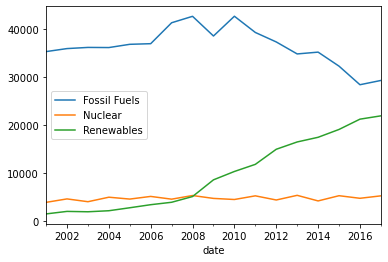

In [61]:
df.fossil_fuels.plot(label='Fossil Fuels')
df.nuclear_energy.plot(label='Nuclear')
df.renewables.plot(label='Renewables')
plt.legend()

### Display the data as table where years are columns, and energy source is rows (Hint: df.pivot_table)

In [62]:
df.pivot_table(columns='date')

date,2001-01-01,2002-01-01,2003-01-01,2004-01-01,2005-01-01,2006-01-01,2007-01-01,2008-01-01,2009-01-01,2010-01-01,2011-01-01,2012-01-01,2013-01-01,2014-01-01,2015-01-01,2016-01-01,2017-01-01
fossil_fuel_pct,86.986790,84.628950,86.052200,83.738089,83.549666,81.397753,83.147173,80.499567,74.471162,74.336191,69.824910,65.953242,61.536968,62.000915,57.047288,52.292161,51.931794
fossil_fuels,35361.000000,35991.000000,36234.000000,36205.000000,36883.000000,37014.000000,41389.000000,42734.000000,38620.000000,42750.000000,39361.000000,37379.000000,34873.000000,35250.000000,32319.000000,28437.000000,29329.000000
nuclear_energy,3853.000000,4574.000000,3988.000000,4929.000000,4538.000000,5095.000000,4519.000000,5282.000000,4679.000000,4451.000000,5215.000000,4347.000000,5321.000000,4152.000000,5243.000000,4703.000000,5214.000000
nuclear_energy_pct,9.478242,10.755267,9.471109,11.400222,10.279760,11.204451,9.078308,9.949893,9.022542,7.739658,9.251211,7.670049,9.389448,7.302916,9.254585,8.648241,9.232240
renewables,1437.000000,1963.000000,1885.000000,2102.000000,2724.000000,3364.000000,3870.000000,5070.000000,8560.000000,10308.000000,11795.000000,14949.000000,16476.000000,17452.000000,19091.000000,21241.000000,21933.000000
renewables_pct,3.534968,4.615783,4.476690,4.861689,6.170574,7.397796,7.774519,9.550541,16.506296,17.924151,20.923879,26.376709,29.073584,30.696169,33.698127,39.059598,38.835966
total_energy,40651.000000,42528.000000,42107.000000,43236.000000,44145.000000,45473.000000,49778.000000,53086.000000,51859.000000,57509.000000,56371.000000,56675.000000,56670.000000,56854.000000,56653.000000,54381.000000,56476.000000


### Make a line plot that shows the amount of energy generated over time. Each source should be a separate line?

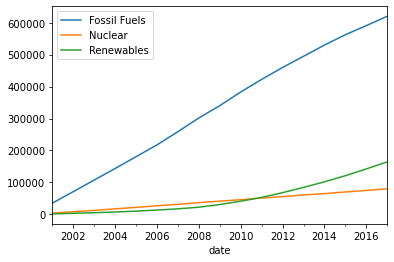

In [63]:
df.fossil_fuels.cumsum().plot(label='Fossil Fuels')
df.nuclear_energy.cumsum().plot(label='Nuclear')
df.renewables.cumsum().plot(label='Renewables')
plt.legend()

### Is the total generation increasing over time?

#### -  How would you control for increasing consumption over time when considering how much energy is coming from each source? 
#### - express each number as a % of the year's total

<AxesSubplot:xlabel='date'>

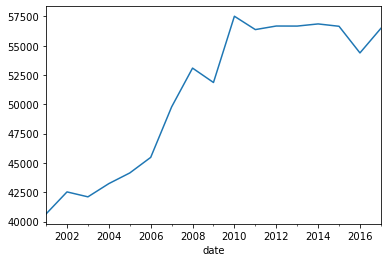

In [64]:
df.total_energy.plot()

### Use the sf_temps dataset

In [75]:
df = data.sf_temps()

In [76]:
df.head()

,temp,date
0,47.8,2010-01-01 00:00:00
1,47.4,2010-01-01 01:00:00
2,46.9,2010-01-01 02:00:00
3,46.5,2010-01-01 03:00:00
4,46.0,2010-01-01 04:00:00


In [77]:
df.date = pd.to_datetime(df.date, format='%Y-%m-%d %H:%m:%s')

In [78]:
df = df.set_index('date')

In [79]:
df.head()

,temp
date,
2010-01-01 00:00:00,47.8
2010-01-01 01:00:00,47.4
2010-01-01 02:00:00,46.9
2010-01-01 03:00:00,46.5
2010-01-01 04:00:00,46.0


### Create 4 categories for temperature, cold, cool, warm, hot (hint: use pd.cut or pd.qcut for this)

In [81]:
df['temp_categories'] = pd.qcut(df.temp, 4, labels=['cold', 'cool', 'warm', 'hot'])

### How does the occurances of these 4 categories change month over month? i.e. how many days have each distinction? Visualize this and give the visual appropriate colors for each category.

In [201]:
days_in_temp_cat = df.groupby('temp_categories').resample('D').mean()

In [204]:
days_in_temp_cat.resample('M').temp_categories.count()

date
2010-01-31     62
2010-02-28     81
2010-03-31    102
2010-04-30    120
2010-05-31    124
2010-06-30    120
2010-07-31    124
2010-08-31    124
2010-09-30    120
2010-10-31    124
2010-11-30    105
2010-12-31     69
Freq: M, Name: temp_categories, dtype: int64

In [203]:
days_in_temp_cat = days_in_temp_cat.reset_index().set_index('date')

In [206]:
days_in_temp_cat

,temp_categories,temp
date,,
2010-01-01,cold,48.425000
2010-01-02,cold,48.560000
2010-01-03,cold,48.645000
2010-01-04,cold,48.690000
2010-01-05,cold,48.521053
...,...,...
2010-11-11,hot,61.775000
2010-11-12,hot,61.500000
2010-11-13,hot,61.400000


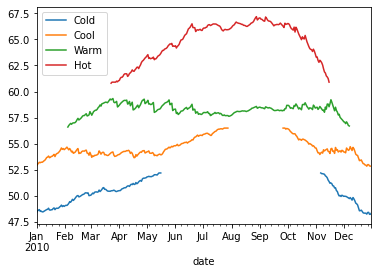

In [208]:
days_in_temp_cat[days_in_temp_cat.temp_categories == 'cold'].temp.plot(label='Cold')
days_in_temp_cat[days_in_temp_cat.temp_categories == 'cool'].temp.plot(label='Cool')
days_in_temp_cat[days_in_temp_cat.temp_categories == 'warm'].temp.plot(label='Warm')
days_in_temp_cat[days_in_temp_cat.temp_categories == 'hot'].temp.plot(label='Hot')

plt.legend()

### Create pretty labels for time plots

### Visualize the number of days of each month that fall into each bin by year (e.g. x=month, y=n_days, hue=temp_bin) or st similar